# Pre-processing data, train/val/split

In [2]:
#loading data
import pandas as pd
df = pd.read_csv('hourly_chronological (without night hours).csv')
df.head()

,Random,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,(Inverter),Unnamed: 13,Unnamed: 14
0,0.605466,01/02/2016,6,0.00,9.92,0.37,-0.01,89.12,4.72,29.19,29.98,0.00,NaN,NaN,NaN
1,0.436647,01/02/2016,7,0.00,10.00,0.47,-0.04,90.08,6.00,29.20,29.99,84.29,NaN,NaN,NaN
2,0.373106,01/02/2016,8,0.14,9.92,0.89,0.30,92.00,2.76,29.22,30.01,531.00,NaN,NaN,NaN
3,0.568974,01/02/2016,9,0.92,10.00,1.97,0.41,86.12,5.56,29.24,30.04,923.75,NaN,NaN,NaN
4,0.817167,01/02/2016,10,0.46,10.00,3.15,1.07,82.48,2.12,29.27,30.06,1947.75,NaN,NaN,NaN


In [3]:
df = df.drop(columns = ['Random', 'Unnamed: 13','Unnamed: 14','(Inverter)'])
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()

,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
0,2016-02-01,6,0.00,9.92,0.37,-0.01,89.12,4.72,29.19,29.98,0.00
1,2016-02-01,7,0.00,10.00,0.47,-0.04,90.08,6.00,29.20,29.99,84.29
2,2016-02-01,8,0.14,9.92,0.89,0.30,92.00,2.76,29.22,30.01,531.00
3,2016-02-01,9,0.92,10.00,1.97,0.41,86.12,5.56,29.24,30.04,923.75
4,2016-02-01,10,0.46,10.00,3.15,1.07,82.48,2.12,29.27,30.06,1947.75


In [4]:
#Train/val/test splitting (80/10/10)
from sklearn.model_selection import train_test_split

train_df, val_test_df = train_test_split(df, test_size=0.2, random_state=42)

val_df, test_df = train_test_split(val_test_df, test_size=0.5, random_state=42)

print(f"Training set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape: {test_df.shape}")

Training set shape: (6028, 11)
Validation set shape: (754, 11)
Test set shape: (754, 11)


In [5]:
train_df = train_df.sort_values(by='Date').reset_index(drop=True)
val_df = val_df.sort_values(by='Date').reset_index(drop=True)
test_df = test_df.sort_values(by='Date').reset_index(drop=True)

train_df.head()

,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
0,2016-02-01,17,0.00,10.00,5.86,0.44,64.64,3.16,29.26,30.05,9.13
1,2016-02-01,13,0.00,10.00,7.56,1.41,64.48,0.00,29.25,30.04,3913.00
2,2016-02-01,12,0.00,10.00,6.16,1.26,68.96,0.00,29.26,30.05,4236.50
3,2016-02-01,8,0.14,9.92,0.89,0.30,92.00,2.76,29.22,30.01,531.00
4,2016-02-01,16,0.00,10.00,8.49,-0.21,54.20,3.20,29.24,30.03,453.93


In [6]:
# Define features (adjust based on your actual column names)
features = [ 'Date' ,'Hour', 'Cloud coverage', 'Visibility', 'Temperature', 'Dew point',
           'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter', 'Solar energy']

# Extract features and target from each dataset
X_train = train_df[features].copy()
X_val = val_df[features].copy()
X_test = test_df[features].copy()

In [7]:
# Extract features and target from each dataset
X_train = train_df[features].copy()
X_val = val_df[features].copy()
X_test = test_df[features].copy()

In [8]:
# Add time features if not already present
for df in [X_train, X_val, X_test]:
    if 'Date' in df.columns:
        df['DayOfYear'] = df['Date'].dt.dayofyear
        df['Month'] = df['Date'].dt.month
        df['DayOfWeek'] = df['Date'].dt.dayofweek

# Update features list with time features
all_features = ['Hour', 'Cloud coverage', 'Visibility', 'Temperature', 'Dew point',
               'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter',
               'DayOfYear', 'Month', 'DayOfWeek']

target = 'Solar energy'

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (6028, 14)
Validation set shape: (754, 14)
Test set shape: (754, 14)


In [9]:
X_train.head()

,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,DayOfYear,Month,DayOfWeek
0,2016-02-01,17,0.00,10.00,5.86,0.44,64.64,3.16,29.26,30.05,9.13,32,2,0
1,2016-02-01,13,0.00,10.00,7.56,1.41,64.48,0.00,29.25,30.04,3913.00,32,2,0
2,2016-02-01,12,0.00,10.00,6.16,1.26,68.96,0.00,29.26,30.05,4236.50,32,2,0
3,2016-02-01,8,0.14,9.92,0.89,0.30,92.00,2.76,29.22,30.01,531.00,32,2,0
4,2016-02-01,16,0.00,10.00,8.49,-0.21,54.20,3.20,29.24,30.03,453.93,32,2,0


In [10]:
from sklearn.preprocessing import MinMaxScaler
# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[all_features + [target]])
X_val_scaled = scaler.transform(X_val[all_features + [target]])
X_test_scaled = scaler.transform(X_test[all_features + [target]])

In [11]:
import numpy as np
# Create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), :-1])  # All features except target
        y.append(data[i + sequence_length, -1])       # Target (Solar energy)
    return np.array(X), np.array(y)

# Parameters
sequence_length = 24  # Use 24 hours to predict next hour

# Create sequences for each dataset
X_train_seq, y_train_seq = create_sequences(X_train_scaled, sequence_length)
X_val_seq, y_val_seq = create_sequences(X_val_scaled, sequence_length)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, sequence_length)

print(f"Training sequences: {X_train_seq.shape}")
print(f"Validation sequences: {X_val_seq.shape}")
print(f"Test sequences: {X_test_seq.shape}")

Training sequences: (6004, 24, 12)
Validation sequences: (730, 24, 12)
Test sequences: (730, 24, 12)


# Building models

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


#LSTM model architecture
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(64, return_sequences=True),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    return model

# Create model
input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])
model = create_lstm_model(input_shape)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
import tensorflow as tf
# Training parameters
batch_size = 32
epochs = 100

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=15, restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001
)

# Train the model
history = model.fit(
    X_train_seq, y_train_seq,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val_seq, y_val_seq),
    callbacks=[early_stopping, reduce_lr],
    verbose=1,
    shuffle=False
)


Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1169 - mae: 0.2787 - val_loss: 0.1092 - val_mae: 0.2767 - learning_rate: 0.0010
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0997 - mae: 0.2676 - val_loss: 0.0999 - val_mae: 0.2797 - learning_rate: 0.0010
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0979 - mae: 0.2691 - val_loss: 0.1002 - val_mae: 0.2800 - learning_rate: 0.0010
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0973 - mae: 0.2690 - val_loss: 0.1012 - val_mae: 0.2827 - learning_rate: 0.0010
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0980 - mae: 0.2713 - val_loss: 0.1022 - val_mae: 0.2851 - learning_rate: 0.0010
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0984 - mae: 0.2733 - val_loss: 0.1019 - val_mae: 0.2846 - learning_rate: 0.0010
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0986 - mae: 0.2732 - val_loss: 0.1007 - val_mae: 0.2826 - learning_rate: 0.00

In [31]:
import numpy as np
# Make predictions on test set
y_test_pred = model.predict(X_test_seq)

# Since we scaled the data, we need to inverse transform the predictions
def inverse_predictions(scaled_predictions, scaler, original_features):
    """Inverse transform scaled predictions back to original scale"""
    # Reshape scaled_predictions to a 1D array if it's not already
    if scaled_predictions.ndim == 3:
        # If the prediction is 3D (samples, timesteps, 1), take the last timestep prediction
        predictions_1d = scaled_predictions[:, -1, 0]
    elif scaled_predictions.ndim == 2 and scaled_predictions.shape[1] == 1:
        # If the prediction is 2D (samples, 1), flatten it to 1D
        predictions_1d = scaled_predictions.flatten()
    elif scaled_predictions.ndim == 1:
        # If it's already 1D (samples,), use it directly
        predictions_1d = scaled_predictions
    else:
        raise ValueError(f"Unexpected shape for scaled_predictions: {scaled_predictions.shape}")

    dummy_array = np.zeros((len(predictions_1d), len(original_features) + 1))
    dummy_array[:, -1] = predictions_1d # Assign the 1D array
    predictions_original = scaler.inverse_transform(dummy_array)[:, -1]
    return predictions_original

def inverse_targets(scaled_targets, scaler, original_features):
    dummy_array = np.zeros((len(scaled_targets), len(original_features) + 1))
    dummy_array[:, -1] = scaled_targets
    targets_original = scaler.inverse_transform(dummy_array)[:, -1]
    return targets_original

# Inverse transform predictions and actual values
y_test_pred_original = inverse_predictions(y_test_pred, scaler, all_features)
y_test_original = inverse_targets(y_test_seq, scaler, all_features)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate metrics
mse = mean_squared_error(y_test_original, y_test_pred_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_test_pred_original)

print(f"Test Set Performance Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# Calculate R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test_original, y_test_pred_original)
print(f"R-squared: {r2:.4f}")

# Calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100

mape = mean_absolute_percentage_error(y_test_original, y_test_pred_original)
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

Test Set Performance Metrics:
Mean Squared Error: 1867902.33
Root Mean Squared Error: 1366.71
Mean Absolute Error: 1159.34
R-squared: 0.0501
Mean Absolute Percentage Error: 474515116036.11%


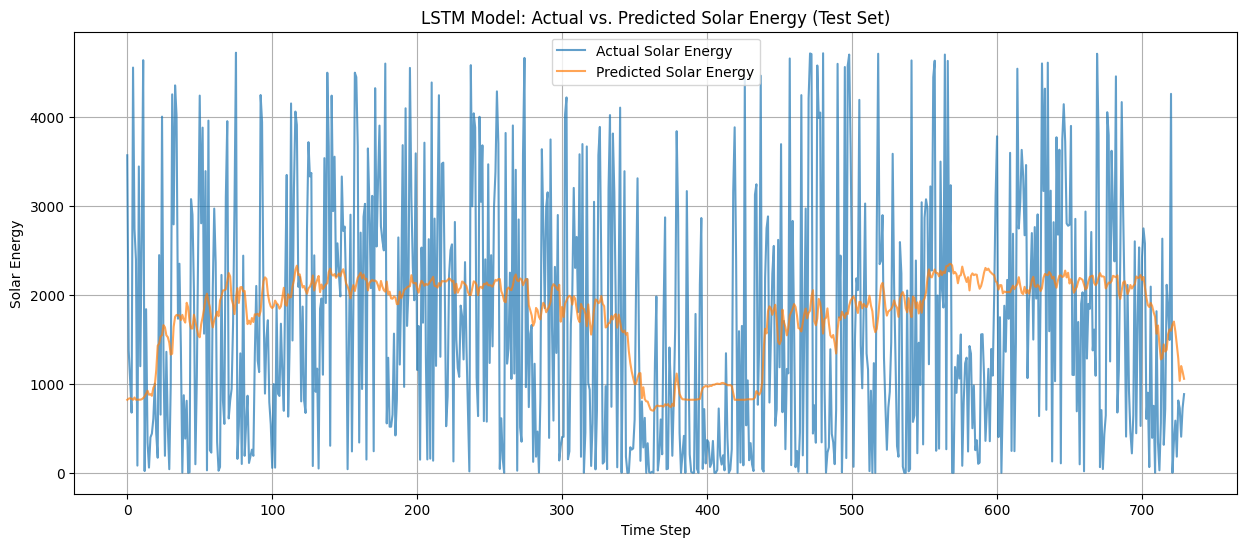

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(y_test_original, label='Actual Solar Energy', alpha=0.7)
plt.plot(y_test_pred_original, label='Predicted Solar Energy', alpha=0.7)
plt.title('LSTM Model: Actual vs. Predicted Solar Energy (Test Set)')
plt.xlabel('Time Step')
plt.ylabel('Solar Energy')
plt.legend()
plt.grid(True)
plt.show()